In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import re

import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/__init__.py:20: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/eli/anaconda3/envs/HTFA

In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
mask_file = '/data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/full-mask.nii.gz'
hollywood_mashup_db = niidb.FMriActivationsDb('data/hollywood_mashup.db', mask=mask_file)

In [6]:
dtfa = DTFA.DeepTFA(hollywood_mashup_db.all(), mask=mask_file, num_factors=100, embedding_dim=2)

07/18/2019 18:39:05 Loading Nifti image /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/subject-01_run-01.nii.gz with mask /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/full-mask.nii.gz (zscore=False, smooth=None)
07/18/2019 18:39:06 Loading Nifti image /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/subject-01_run-02.nii.gz with mask /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/full-mask.nii.gz (zscore=False, smooth=None)
07/18/2019 18:39:07 Loading Nifti image /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/subject-01_run-03.nii.gz with mask /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/full-mask.nii.gz (zscore=False, smooth=None)
07/18/2019 18:39:07 Loading Nifti image /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/su

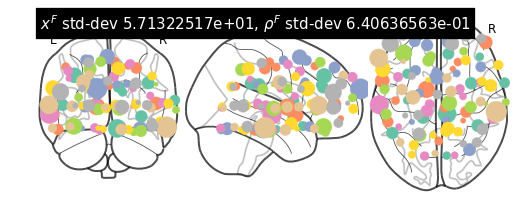

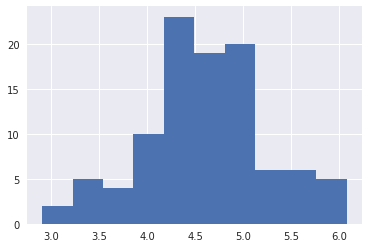

(<nilearn.plotting.displays.OrthoProjector at 0x7f016a4679e8>,
 tensor([[  9.4022, -26.3065, -19.8460],
         [-35.5888,  37.8318,  35.9903],
         [-15.9411, -30.5149,  27.0307],
         [ 43.8494,  33.5749,  26.4692],
         [-48.1906, -46.6879,   4.9200],
         [ 41.8159, -38.8776,  28.0995],
         [ 34.7752,   5.7031,  -7.2238],
         [ 14.9946,  76.9334,  18.3892],
         [-32.5049,  15.6027, -16.7443],
         [-32.5430, -12.2882, -20.1032],
         [  9.0564, -70.4655, -21.0329],
         [ 10.8007,  36.6840,  23.8449],
         [ 69.8793,   6.1333,   9.8384],
         [ 20.8397,  28.0277,  46.3156],
         [ 50.1485,  48.6598,   6.3837],
         [-44.7886, -12.6292,  45.0732],
         [-56.5564,  55.3168,  -8.9232],
         [  0.6680, -55.0505,  25.1386],
         [  6.9135, -19.9852,  50.1458],
         [ 26.3429, -33.6020,   3.9315],
         [-52.8660, -34.9343, -21.0174],
         [-12.2669,  -0.8538,   3.1708],
         [ 29.3916, -24.4512,  43.7

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-4}, log_level=logging.INFO, num_particles=1,
                    batch_size=1, use_cuda=True, checkpoint_steps=100, blocks_batch_size=50, patience=100)

07/18/2019 18:42:00 [Epoch 1] (76509ms) Posterior free-energy 2.85766208e+08 = KL from prior 2.31769975e+06 - log-likelihood -2.83448576e+08
07/18/2019 18:42:00 Saving checkpoint...
07/18/2019 18:43:17 [Epoch 2] (76570ms) Posterior free-energy 2.69551680e+08 = KL from prior 2.23384125e+06 - log-likelihood -2.67317840e+08
07/18/2019 18:44:33 [Epoch 3] (76068ms) Posterior free-energy 2.64706976e+08 = KL from prior 2.18380575e+06 - log-likelihood -2.62523200e+08
07/18/2019 18:45:49 [Epoch 4] (76261ms) Posterior free-energy 2.62429840e+08 = KL from prior 2.12787400e+06 - log-likelihood -2.60301952e+08
07/18/2019 18:47:06 [Epoch 5] (76502ms) Posterior free-energy 2.61202816e+08 = KL from prior 2.05879262e+06 - log-likelihood -2.59144000e+08
07/18/2019 18:48:22 [Epoch 6] (76039ms) Posterior free-energy 2.60391632e+08 = KL from prior 1.97084038e+06 - log-likelihood -2.58420784e+08
07/18/2019 18:49:39 [Epoch 7] (76622ms) Posterior free-energy 2.59801728e+08 = KL from prior 1.86022062e+06 - log

RuntimeError: CUDA out of memory. Tried to allocate 56.00 MiB (GPU 0; 10.91 GiB total capacity; 6.91 GiB already allocated; 43.25 MiB free; 250.61 MiB cached)

In [ ]:
utils.plot_losses(losses)

In [ ]:
def subject_labeler(subject):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        condition = 'Major Depressive'
    elif condition == 'control':
        condition = 'Control'
    return '%s Participant %d' % (condition, int(sub_num))

In [ ]:
def task_labeler(task):
    if task == 'negative_music':
        task = 'Negative music'
    elif task == 'positive_music':
        task = 'Positive music'
    else:
        task = task.capitalize()
    return task

In [ ]:
def lepping_2017_labeler(block):
    subject = subject_labeler(block.subject)
    task = task_labeler(block.task)
    return subject + ', ' + task + ' stimulus'

In [ ]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_original_brain(b, labeler=lepping_2017_labeler)
    dtfa.plot_reconstruction(b, labeler=lepping_2017_labeler)

In [ ]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None)

In [ ]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

In [ ]:
dtfa.visualize_factor_embedding()

In [ ]:
dtfa.average_reconstruction_error()

In [ ]:
def condition_labeler(subject):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        return 'Major Depressive'
    elif condition == 'control':
        return 'Control'
    return condition

In [ ]:
dtfa.scatter_subject_embedding(labeler=condition_labeler, figsize=None)

In [ ]:
dtfa.average_reconstruction_error(weighted=False)